In [153]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import sys
import imodels
import notebook_helper
import imodelsx.process_results
sys.path.append('../experiments/')
results_dir = '../results/linear/'

r = imodelsx.process_results.get_results_df(results_dir)
experiment_filename = '../experiments/02_train_linear.py'
r = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename)
# r.to_pickle('../results/agg.pkl')
# imodelsx.process_results.delete_runs_in_dataframe(r[r.use_bagging_ensemble == 1], actually_delete=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 540/540 [00:00<00:00, 3779.81it/s]


In [154]:
r['r2_gap'] = r['r2_train'] - r['r2_test']

In [156]:
r['r2_gap'].mean()

0.03362469813014708

In [157]:
for k in ["seed"]: #, "dataset_name"]:
    r = imodelsx.process_results.average_over_seeds(
        r, experiment_filename, key_to_average_over=k
    )

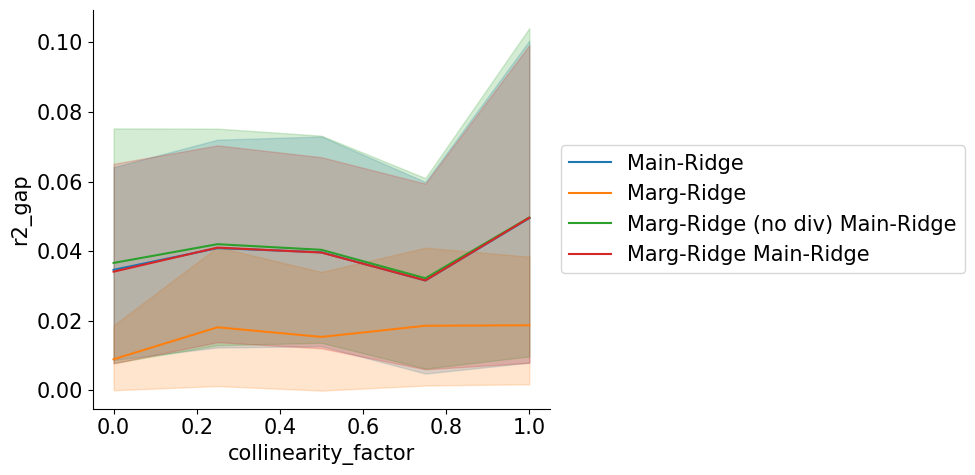

In [158]:
r["legend"] = (
    r["est_marginal_name"].map({"None": "", "ridge": "Marg-Ridge "})
    + r["use_marginal_divide_by_d"].map({0: "(no div) ", 1: ""})
    + r["est_main_name"].map({"None": "", "ridge": "Main-Ridge"})
)

fig, ax = plt.subplots(figsize=(10, 5))
x = 'collinearity_factor' # 'train_frac', 'y_train_noise_std', 'collinearity_factor'
# sns.lineplot(data=r, x="train_frac", y="r2_test", hue="legend", markers=True)
sns.lineplot(data=r, x=x, y="r2_gap", hue="legend", markers=True)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# plt.yscale("log")
plt.show()

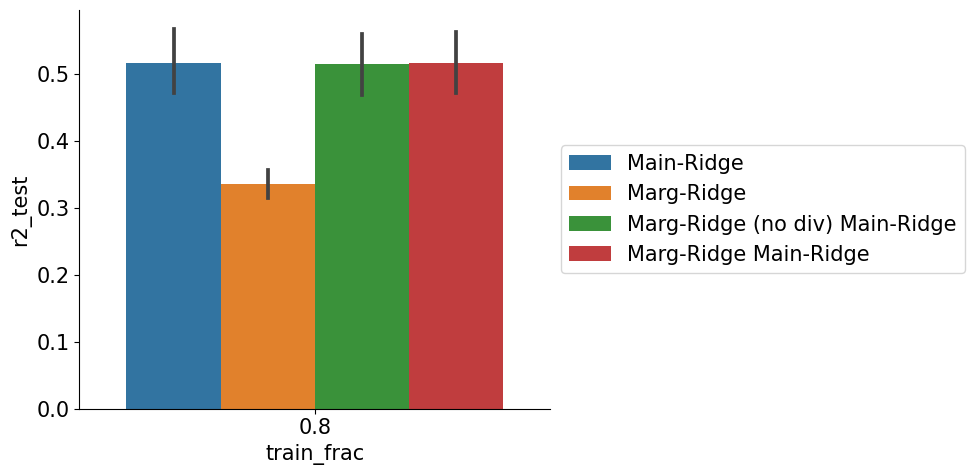

In [151]:
d = r[r.train_frac >= 0.8]
d = d[d.r2_test >= 0.3]
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=d, x="train_frac", y="r2_test", hue="legend")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

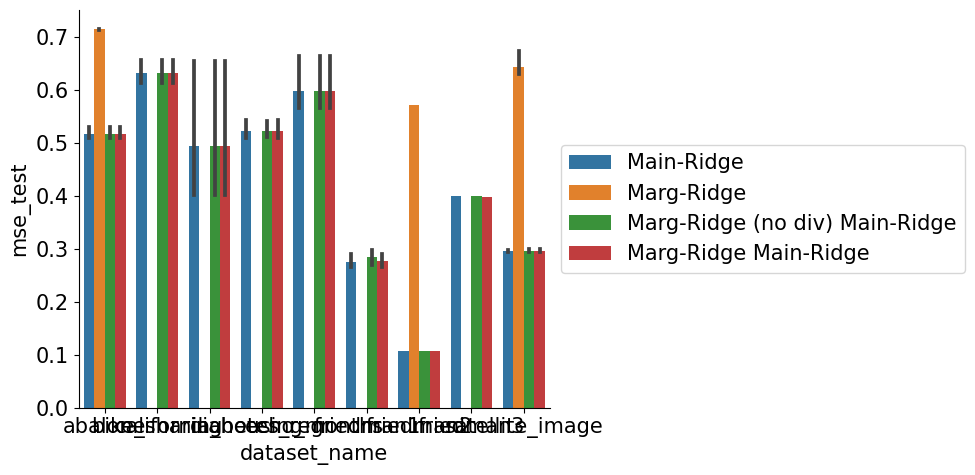

In [152]:
# d = r[r.train_frac >= 0.8]
# d = r[r.train_frac <= 0.3]
# d = d[d.r2_test >= 0.3]
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=d, x= "dataset_name", y="mse_test", hue="legend")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()